**Downloading Libraries**

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-dataset-19212020-600k-tracks/dict_artists.json
/kaggle/input/spotify-dataset-19212020-600k-tracks/artists.csv
/kaggle/input/spotify-dataset-19212020-600k-tracks/tracks.csv


**Data Loading**

This dataset is a public dataset from kaggle, it contains over 600k songs from spotify's API from year 1921 to 2020

In [3]:
dataset = pd.read_csv('../input/spotify-dataset-19212020-600k-tracks/tracks.csv')
dataset.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


**Adding Year Column To dataset DataFrame**

In [4]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])
dataset['year'] = dataset['release_date'].apply(lambda time: time.year)

In [5]:
dataset.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'year'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                586672 non-null  object        
 1   name              586601 non-null  object        
 2   popularity        586672 non-null  int64         
 3   duration_ms       586672 non-null  int64         
 4   explicit          586672 non-null  int64         
 5   artists           586672 non-null  object        
 6   id_artists        586672 non-null  object        
 7   release_date      586672 non-null  datetime64[ns]
 8   danceability      586672 non-null  float64       
 9   energy            586672 non-null  float64       
 10  key               586672 non-null  int64         
 11  loudness          586672 non-null  float64       
 12  mode              586672 non-null  int64         
 13  speechiness       586672 non-null  float64       
 14  acou

In [7]:
dataset.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
year                 0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
year                0
dtype: int64

In [10]:
dataframe = dataset.drop(columns=['id','name','artists','id_artists','release_date'])
dataframe.fillna(0)
dataframe.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
popularity,1.000000,0.027638,0.211749,0.186878,0.302178,0.015306,0.327001,-0.033652,-0.047415,-0.370723,-0.236403,-0.048735,0.004558,0.071223,0.086713,0.590796
duration_ms,0.027638,1.000000,-0.016753,-0.120411,0.024782,0.004625,0.000314,-0.027604,-0.125783,-0.064394,0.069327,0.002139,-0.163233,-0.001249,0.037553,0.054084
explicit,0.211749,-0.016753,1.000000,0.150216,0.123060,0.010933,0.134598,-0.051757,0.102251,-0.149001,-0.067510,-0.013113,-0.016551,0.005723,0.044442,0.208475
danceability,0.186878,-0.120411,0.150216,1.000000,0.241464,0.018837,0.251394,-0.044726,0.199291,-0.242838,-0.225831,-0.106175,0.528136,-0.040896,0.146166,0.226596
energy,0.302178,0.024782,0.123060,0.241464,1.000000,0.036303,0.764744,-0.065238,-0.053560,-0.715366,-0.195727,0.124636,0.372224,0.230006,0.188971,0.460131
key,0.015306,0.004625,0.010933,0.018837,0.036303,1.000000,0.027106,-0.129495,-0.001034,-0.027427,-0.006788,-0.006763,0.019998,0.004912,0.008871,0.023678
loudness,0.327001,0.000314,0.134598,0.251394,0.764744,0.027106,1.000000,-0.040456,-0.167140,-0.519423,-0.329255,0.029509,0.275416,0.189252,0.164376,0.447057
mode,-0.033652,-0.027604,-0.051757,-0.044726,-0.065238,-0.129495,-0.040456,1.000000,-0.017992,0.058914,-0.010023,0.007025,0.011494,0.007877,-0.015899,-0.081315
speechiness,-0.047415,-0.125783,0.102251,0.199291,-0.053560,-0.001034,-0.167140,-0.017992,1.000000,0.069121,-0.102425,0.207062,0.046481,-0.086950,-0.114211,-0.081996
acousticness,-0.370723,-0.064394,-0.149001,-0.242838,-0.715366,-0.027427,-0.519423,0.058914,0.069121,1.000000,0.204312,-0.004742,-0.180878,-0.195117,-0.173920,-0.527429


**Max Min Normalization**

**Why to normalize prior to model fitting?**

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

**The mathematical formulation**

![https://miro.medium.com/max/287/1*eO8b-xIGhnLgsQol3O6ksw.png](https://miro.medium.com/max/287/1*eO8b-xIGhnLgsQol3O6ksw.png)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

datatypes= ['int16','int32','int64','float16','float32','float64']
normalization = dataset.select_dtypes(include=datatypes)

scaled_X = scaler.fit_transform(normalization.values)

scaled_df = pd.DataFrame(scaled_X, columns = normalization.columns)
scaled_df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,-1.17441,-0.815219,-0.214767,0.489991,-0.385340,-1.483653,-0.615436,0.719665,1.923988,0.642744,2.363098,-0.341420,-1.650565,-0.457513,-1.846096,-2.916458
1,-1.50104,-1.042061,-0.214767,0.791012,-1.107820,-1.483653,-2.344121,0.719665,4.736625,0.995370,-0.425062,-0.357696,0.398543,-0.553001,-6.073427,-2.916458
2,-1.50104,-0.382627,-0.214767,-0.780318,-1.449212,-1.199515,-2.156280,0.719665,-0.298329,1.560144,-0.343366,-0.010488,-0.369872,0.401509,2.381235,-2.916458
3,-1.50104,-0.420032,-0.214767,-1.460626,-1.776312,0.505313,-3.488653,0.719665,-0.302776,1.563011,3.015167,-0.596401,-0.602726,1.730747,-1.846096,-2.916458
4,-1.50104,-0.529309,-0.214767,-0.972971,-1.524635,-0.631239,-1.315320,-1.389535,-0.366143,1.545809,0.062116,0.526599,-1.382783,-0.512313,0.267570,-2.916458


**Compariosn between original data and minmaxscaler data**

Here we are comparing The MinMax scaling effect on the **danceability and popularity** features of the original dataset. 

[Text(0.5, 1.0, 'MinMaxScaler data')]

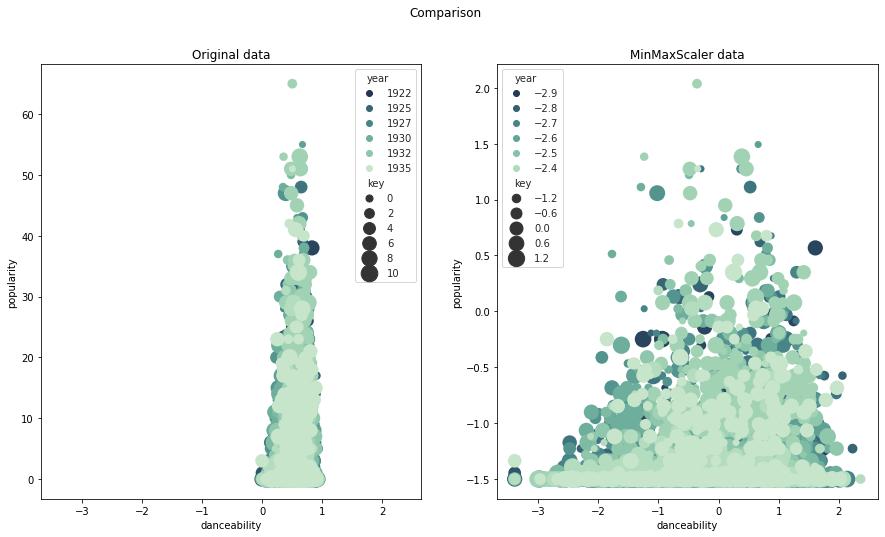

In [12]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,8))
fig.suptitle('Comparison')
sns.set_style('whitegrid')
sns.scatterplot(ax=axes[0], x="danceability", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.4,d=.2_r",
                sizes=(50, 300), linewidth=0,
                data=dataset[:10000],legend=True).set(title='Original data')

sns.scatterplot(ax=axes[1], x="danceability", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.4,d=.2_r",
                sizes=(50, 300), linewidth=0,
                data=scaled_df[:10000],legend=True).set(title='MinMaxScaler data')

**Clustering Algorithm**

Clustering is the process of grouping observations of similar kinds into smaller groups within the larger population. It has a widespread application in business analytics.

We can try out various clustering algorithm to fit out data into groups of cluster which will then used by our model.

There are 5 different clustering techniques:
> * Kmeans
> * BIRCH
> * MiniBatchKmeans
> * C means
> * Gausian Mixture

So for this dataset we are using **KMeans Clustering Algorithm**.

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

![https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png](https://static.javatpoint.com/tutorial/machine-learning/images/k-means-clustering-algorithm-in-machine-learning.png)

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
kmeans = KMeans(n_clusters=10)
features = kmeans.fit_predict(scaled_df)
dataset['features'] = features
MinMaxScaler(dataset['features'])

MinMaxScaler(feature_range=0         4
1         3
2         5
3         4
4         2
         ..
586667    6
586668    7
586669    2
586670    7
586671    7
Name: features, Length: 586601, dtype: int32)

**Music Recommender**

There are 2 major approaches for building recommendation systems — content-based and collaborative filtering.
> **Content based:** The gist of this approach is that we match users to the content or items they have liked or bought. Here the attributes of the users and the >products are important. For example, for movie recommendations, we use features such as director, actors, movie length, genre, etc. to find >similarity between movies.

> **Collaborative Filtering:** The underlying assumption of the collaborative filtering approach is that if A and B buy similar products, A is more likely to buy a product that >B has bought than a product which a random person has bought. Unlike content based, there are no features corresponding to users or items here.

So here we are using Content based approcach.

In [14]:
class Music_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [0, 1, 5, 6, 7]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['id','name','artists','release_date','year','duration_ms']
        return rec[columns][:amount]

recommendations = Music_Recommendation(dataset)
recommendations.recommend("Dance Monkey", 10)

100%|██████████| 586595/586595 [00:26<00:00, 21916.97it/s]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,name,artists,release_date,year,duration_ms
93798,2hwOoMtWPtTSSn6WHV7Vp5,Blue World,['Mac Miller'],2020-01-17,2020,209440
118831,3QwBODjSEzelZyVjxPOHdq,Otra vez (feat. J Balvin),"['Zion & Lennox', 'J Balvin']",2016-09-30,2016,209453
156941,0jMU9W1kcLyxXYloMHCt2i,La Copa Rota,['Marc Anthony'],2013-07-23,2013,209440
238254,15zmYFxKIToe8TlX3JbHLm,Chingo de Cheve,['Millonario'],2016-06-17,2016,209440
178459,3KlKNC9vfmdREv97mK0Xce,Me ei mennä rikki,"['Gasellit', 'Karri Koira']",2021-02-12,2021,209453
157632,7pk3EpFtmsOdj8iUhjmeCM,Otra vez (feat. J Balvin),"['Zion & Lennox', 'J Balvin']",2016-08-05,2016,209453
85330,4RyK6N4IQ85xxLgguQAFH5,Blue Jeans,['Lana Del Rey'],2012-01-01,2012,209440
80517,5BHn36lqBKrAehBUZWpzJT,Hamma! - Single Edit,['Culcha Candela'],2007-08-31,2007,209453
462539,4WeY3KuRSoiPn8ub2dd8bg,Dans mon del,['Jul'],2014-02-24,2014,209434
85358,0KbIwqCAHmXWu7hrszXY6j,Party We Will Throw Now!,"['Warren G', 'Nate Dogg', 'The Game']",2012-04-24,2012,209413
